In [1]:
from PIL import Image
import numpy as np
import requests
import torch

In [2]:
from transformers import DPTImageProcessor, DPTForDepthEstimation

In [3]:
image_processor = DPTImageProcessor.from_pretrained("Intel/dpt-hybrid-midas")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-hybrid-midas", low_cpu_mem_usage=True)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/9.88k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/490M [00:00<?, ?B/s]

In [9]:
#url = "/content/01129.jpg"
image = "/content/01129.jpg"


In [11]:
from PIL import Image
import requests
from io import BytesIO

# Example with local file path
image_path = "/content/01129.jpg"
image = Image.open(image_path)

# If it's a URL, you can fetch the image and open it
# image_url = 'http://example.com/your_image.jpg'
# response = requests.get(image_url)
# image = Image.open(BytesIO(response.content))

# Now process the image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)


In [13]:
# prepare image for the model
inputs = image_processor(images=image, return_tensors="pt")

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

# visualize the prediction
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)
depth.show()

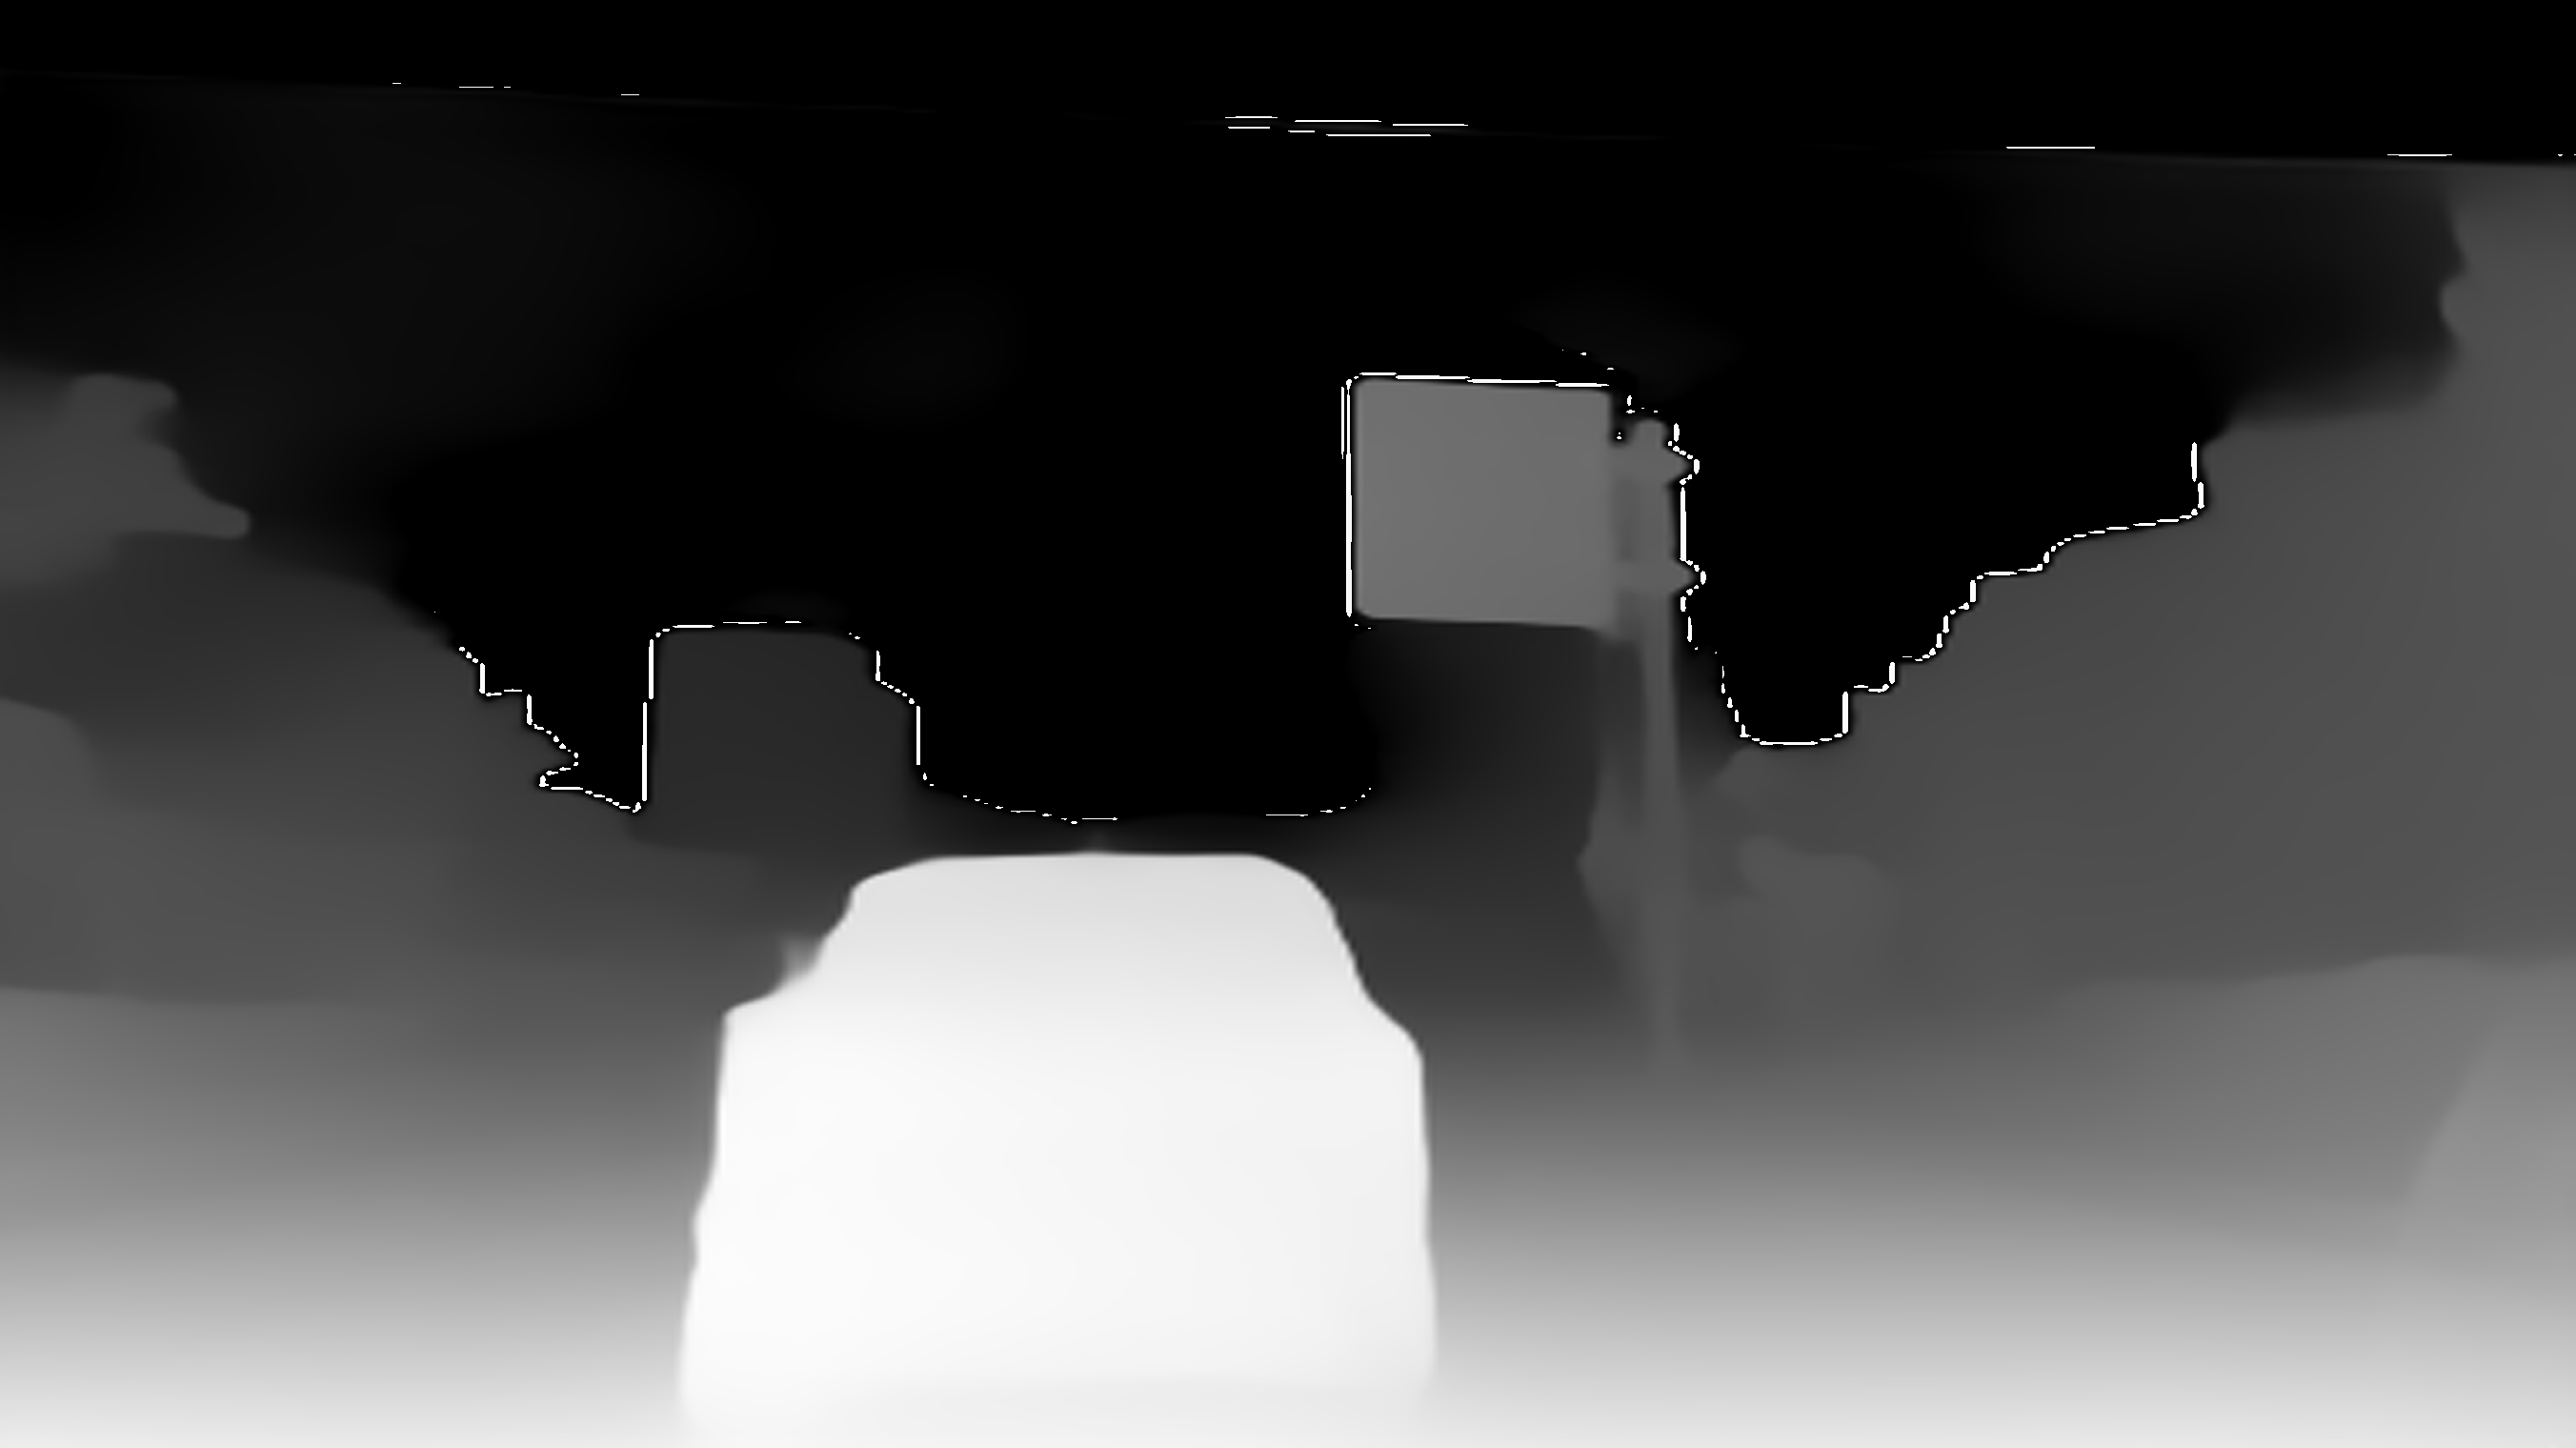

In [14]:
depth

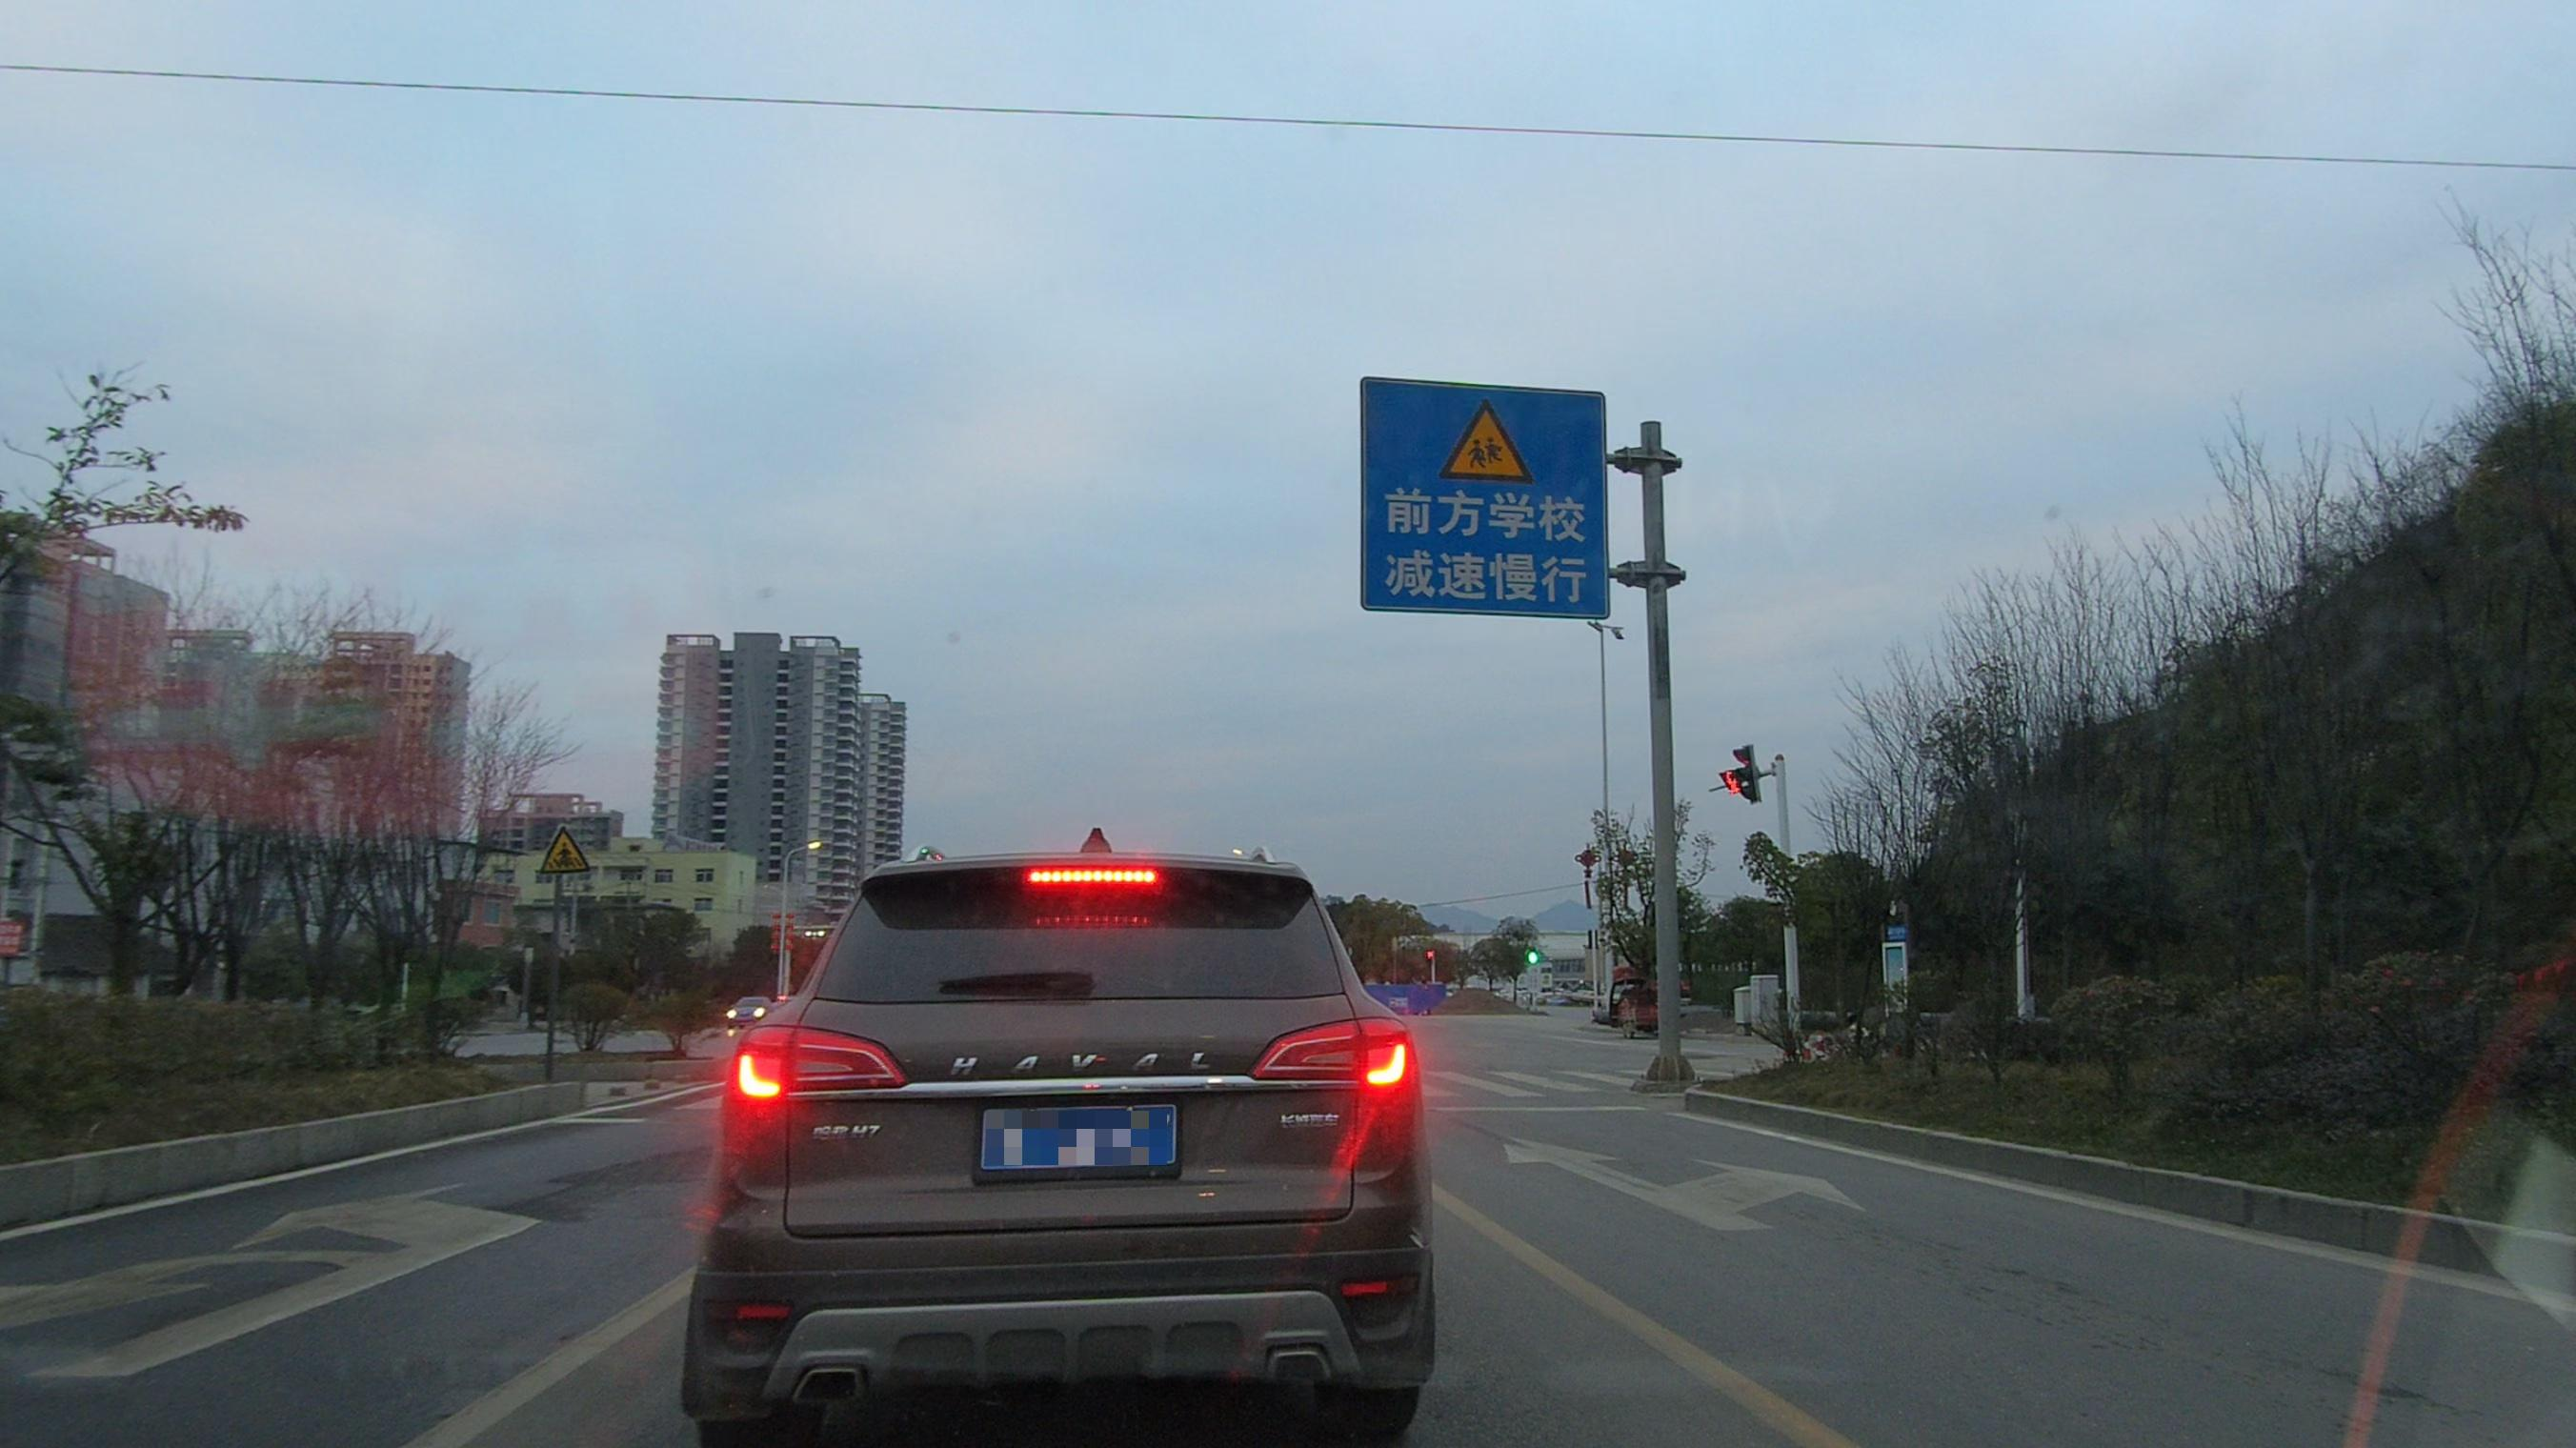

In [12]:
image

In [19]:
output

array([[ 565.99335,  563.8598 ,  561.7632 , ...,  591.06476,  511.81094,
         449.5956 ],
       [ 547.59467,  552.1135 ,  558.3921 , ...,  586.0067 ,  565.7713 ,
         550.60284],
       [ 545.4435 ,  549.0067 ,  553.8659 , ...,  584.4589 ,  590.4706 ,
         595.8062 ],
       ...,
       [1553.6401 , 1553.4524 , 1553.1229 , ..., 1190.0402 , 1185.024  ,
        1181.1449 ],
       [1557.6923 , 1558.187  , 1558.6592 , ..., 1191.3853 , 1183.6986 ,
        1178.0399 ],
       [1552.6047 , 1556.793  , 1561.577  , ..., 1188.8383 , 1181.163  ,
        1176.0421 ]], dtype=float32)

In [23]:
import numpy as np

# Your depth matrix
depth_matrix = np.array( output, dtype=np.float32)

# Hypothetical scaling factor to convert to meters
scaling_factor = 0.0012  # Replace this with the actual scaling factor if known

# Convert depth values to meters
depth_in_meters = depth_matrix * scaling_factor

# Calculate a single representative value (mean or median)
mean_depth = np.mean(depth_in_meters)
median_depth = np.median(depth_in_meters)

print(f"Mean depth in meters from drivers view: {mean_depth}")
print(f"Median depth in meters from drivers view: {median_depth}")


Mean depth in meters from drivers view: 1.1159039735794067
Median depth in meters from drivers view: 1.1989765167236328
